In [1]:
import imageio
import glob
import numpy as np

arr = []
for im_path in glob.glob("../input/trees-in-satellite-imagery/Trees in Satellite Imagery/Trees/*.jpg"):
     im = imageio.imread(im_path)
     arr.append(im)
data = np.array(arr)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  import sys


In [2]:
data.shape

(5200, 64, 64, 3)

In [3]:
n_split = 1
data = data.reshape(int(data.shape[0]*n_split**2), int(data.shape[1]/n_split),int(data.shape[1]/n_split),3)

In [4]:
data.shape

(5200, 64, 64, 3)

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D
import matplotlib.pyplot as plt
from keras import backend as K
from keras import layers
%matplotlib inline

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(data, test_size=0.2, random_state=42)
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [7]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1],x_train.shape[1],3)
x_test = x_test.reshape(x_test.shape[0], x_train.shape[1],x_train.shape[1],3)

In [8]:
input_img = keras.Input(shape=(64, 64, 3))

x = Conv2D(32, kernel_size = (3,3), activation='relu', padding = 'same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, kernel_size = (3,3), activation='relu', padding = 'same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, kernel_size = (3,3), activation='relu', padding = 'same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

2022-11-15 18:32:23.847415: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [9]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 8)           0     

In [10]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=64,
                shuffle=True,
                validation_data=(x_test, x_test))

2022-11-15 18:32:24.535412: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
65/65 [==============================] - 9s 130ms/step - loss: 0.0235 - val_loss: 0.0057
Epoch 2/10
65/65 [==============================] - 7s 114ms/step - loss: 0.0036 - val_loss: 0.0028
Epoch 3/10
65/65 [==============================] - 7s 115ms/step - loss: 0.0025 - val_loss: 0.0022
Epoch 4/10
65/65 [==============================] - 7s 112ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 5/10
65/65 [==============================] - 8s 123ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 6/10
65/65 [==============================] - 7s 115ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 7/10
65/65 [==============================] - 7s 112ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 8/10
65/65 [==============================] - 8s 117ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 9/10
65/65 [==============================] - 8s 125ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 10/10
65/65 [==============================] - 7s 112ms/step - loss: 0.0014 - val_loss: 0.0014

In [11]:
arrb = []
for im_path in glob.glob("../input/trees-in-satellite-imagery/Trees in Satellite Imagery/NoTrees/*.jpg"):
     im = imageio.imread(im_path)
     arrb.append(im)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
data_anomaly = np.array(arrb)

In [13]:
n_split = 1
data_anomaly = data_anomaly.reshape(int(data_anomaly.shape[0]*n_split**2), int(data_anomaly.shape[1]/n_split),int(data_anomaly.shape[1]/n_split), 3)

In [14]:
data_anomaly = data_anomaly.reshape(data_anomaly.shape[0], data_anomaly.shape[1],data_anomaly.shape[1],3)

In [15]:
n = 1000
tree  = x_test[0:n].reshape(n,64,64,3)
no_tree = data_anomaly[0:n].reshape(n, 64,64,3) 
no_tree = no_tree.astype('float32') / 255.
tree_reconstruct = autoencoder.predict(tree).reshape(n,(64**2)*3)
no_tree_reconstruct = autoencoder.predict(no_tree).reshape(n,(64**2)*3)

In [16]:
rmse_tree = np.sqrt(np.square(tree.reshape(n,(64**2)*3) - tree_reconstruct)).mean(axis=-1)
rmse_no_tree = np.sqrt(np.square(no_tree.reshape(n,(64**2)*3) - no_tree_reconstruct)).mean(axis=-1)

In [17]:
threshold = 0.05

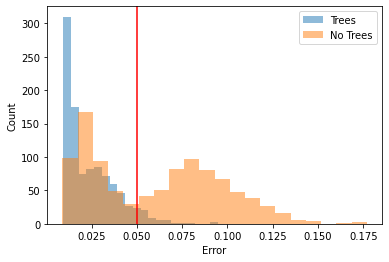

In [18]:
from matplotlib import pyplot
plt.hist(rmse_tree,alpha=0.5, label='Trees', bins = 20)
plt.hist(rmse_no_tree,alpha=0.5, label='No Trees', bins = 20)
plt.legend(loc='upper right')
plt.xlabel('Error')
plt.ylabel('Count')
plt.axvline(x = threshold, color = 'r', label = 'Threshold')
pyplot.show()

In [19]:
tree_labels = np.zeros((n,1))
no_tree_labels = np.ones((n,1))
y_true = np.concatenate((tree_labels, no_tree_labels), axis = 0)

In [20]:
anomaly_prediction = np.where(rmse_tree  > threshold, 0, 1)
normal_prediction = np.where(rmse_no_tree  < threshold, 0, 1)
y_pred = np.concatenate((normal_prediction, anomaly_prediction), axis = 0)

In [21]:
from sklearn.metrics import accuracy_score

accuracy_score(y_true, y_pred)

0.689

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_true, y_pred)

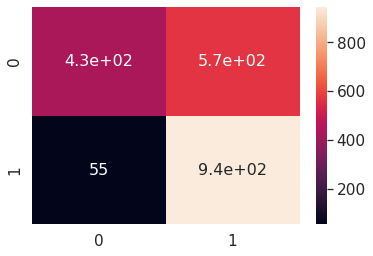

In [23]:
import seaborn as sn
sn.set(font_scale=1.4) # for label size
sn.heatmap(confusion_matrix, annot=True, annot_kws={"size": 16}) # font size

plt.show()